In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

import warnings 
warnings.filterwarnings("ignore")

## Prepare rules for the all the data sets 
    1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
    2) Change the minimum length in apriori algorithm
    3) Visulize the obtained rules using different plots 

# Import Data & EDA

In [2]:
books=pd.read_csv("/Users/ayaskantsamal/Documents/EXCELR/assignments/book.csv")

In [3]:
books.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
books.shape

(2000, 11)

In [5]:
books.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
books.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [7]:
#books.value_counts()
for i in books:
    print(i)
    print(books[i].value_counts())
    print()


ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [8]:
frequent_dataSets_1 = apriori(books, min_support=0.1, use_colnames=True)
frequent_dataSets_1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [9]:
print(len(frequent_dataSets_1))

39


In [10]:
rules_1 = association_rules(frequent_dataSets_1, metric="lift", min_threshold=.2)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [11]:
print(len(rules_1)),rules_1.lift.value_counts()

100


(None,
 1.778809    2
 1.840820    2
 1.882497    2
 1.813963    2
 2.035985    2
            ..
 2.022385    1
 1.576044    1
 1.841017    1
 2.230842    1
 1.883445    1
 Name: lift, Length: 70, dtype: int64)

In [12]:
rules_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         100 non-null    object 
 1   consequents         100 non-null    object 
 2   antecedent support  100 non-null    float64
 3   consequent support  100 non-null    float64
 4   support             100 non-null    float64
 5   confidence          100 non-null    float64
 6   lift                100 non-null    float64
 7   leverage            100 non-null    float64
 8   conviction          100 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.2+ KB


### Visualising Rules paramters with diff plots

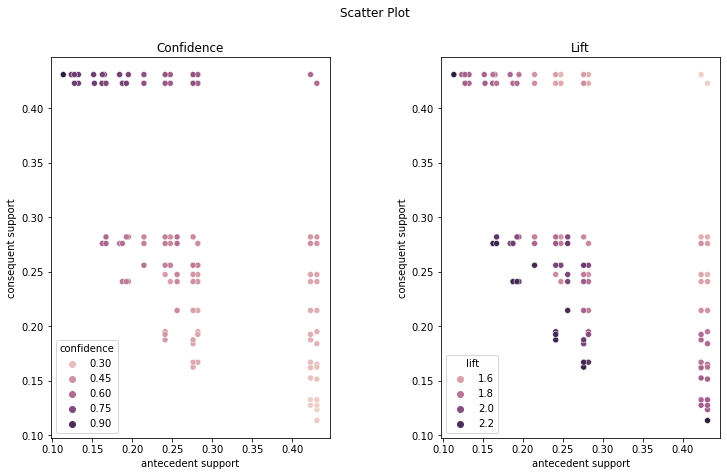

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,7))
fig.suptitle('Scatter Plot')

sns.scatterplot(ax=ax[0],x='antecedent support',y='consequent support',hue='confidence',data=rules_1)
ax[0].set_title('Confidence')

sns.scatterplot(ax=ax[1],x='antecedent support',y='consequent support',hue='lift',data=rules_1)
ax[1].set_title('Lift')

plt.subplots_adjust(wspace=0.4)
plt.show()

    -The first subplot shows relationship of antecedent and consequent support with confidence
    -The second subplot shows relationship of lift with antecedent and consequent support
    -the dark color represents strong confidence and lift values, and viceversa is the case for light colors

### Visualisation via HeatMap

In [14]:
# selecting rules with high confidence,lift and support
rules_2=rules_1.loc[(rules_1['lift']>1.7)& (rules_1['confidence']>0.70)& (rules_1['support']>0.1)]
rules_2.head(10),rules_2.shape

(             antecedents consequents  antecedent support  consequent support  \
 28            (ItalCook)   (CookBks)              0.1135               0.431   
 41  (ChildBks, YouthBks)   (CookBks)              0.1650               0.431   
 42   (CookBks, YouthBks)  (ChildBks)              0.1620               0.423   
 46  (DoItYBks, ChildBks)   (CookBks)              0.1840               0.431   
 47   (DoItYBks, CookBks)  (ChildBks)              0.1875               0.423   
 52    (RefBks, ChildBks)   (CookBks)              0.1515               0.431   
 53     (RefBks, CookBks)  (ChildBks)              0.1525               0.423   
 58    (ChildBks, ArtBks)   (CookBks)              0.1625               0.431   
 60     (ArtBks, CookBks)  (ChildBks)              0.1670               0.423   
 64   (GeogBks, ChildBks)   (CookBks)              0.1950               0.431   
 
     support  confidence      lift  leverage  conviction  
 28   0.1135    1.000000  2.320186  0.064582    

In [15]:
# Constructing  pivot table
pvt_table1=rules_2.pivot(index='antecedents',columns='consequents',values='support')
pvt_table2=rules_2.pivot(index='antecedents',columns='consequents',values='confidence')
pvt_table3=rules_2.pivot(index='antecedents',columns='consequents',values='lift')

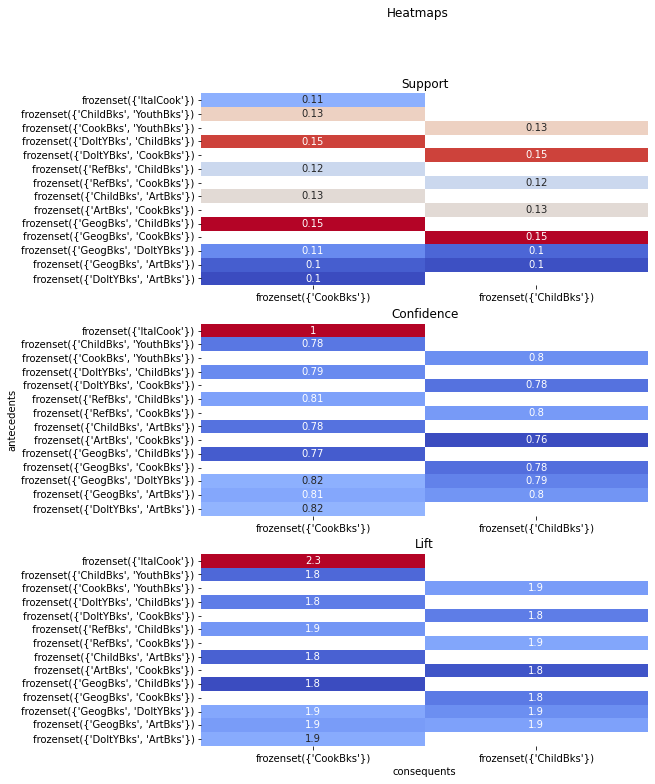

In [16]:
fig, ax = plt.subplots(3,1,figsize=(8,12))
fig.suptitle('Heatmaps')

sns.heatmap(ax=ax[0],data=pvt_table1,annot=True,cbar=False,cmap='coolwarm')
ax[0].set_title('Support')
ax[0].set(xlabel=None)
ax[0].set(ylabel=None)

sns.heatmap(ax=ax[1],data=pvt_table2,annot=True,cbar=False,cmap='coolwarm')
ax[1].set_title('Confidence')
ax[1].set(xlabel=None)

sns.heatmap(ax=ax[2],data=pvt_table3,annot=True,cbar=False,cmap='coolwarm')
ax[2].set_title('Lift')
ax[2].set(ylabel=None)


plt.show()

### Parallel cordinate plots

In [17]:
# changing the values to string

rules_2["antecedents"]=rules_2["antecedents"].apply(lambda a: ','.join(list(a)))
rules_2["consequents"]=rules_2["consequents"].apply(lambda a: ','.join(list(a)))



In [18]:
# creating a column called 'rule no' to store rule numbers
rules_2['rule no']=np.arange(1,17)
rules_2
rules_3=rules_2.iloc[:,[0,1,9]]
rules_3


,antecedents,consequents,rule no
28,ItalCook,CookBks,1
41,"ChildBks,YouthBks",CookBks,2
42,"CookBks,YouthBks",ChildBks,3
46,"DoItYBks,ChildBks",CookBks,4
47,"DoItYBks,CookBks",ChildBks,5
52,"RefBks,ChildBks",CookBks,6
53,"RefBks,CookBks",ChildBks,7
58,"ChildBks,ArtBks",CookBks,8
60,"ArtBks,CookBks",ChildBks,9
64,"GeogBks,ChildBks",CookBks,10


<AxesSubplot:>

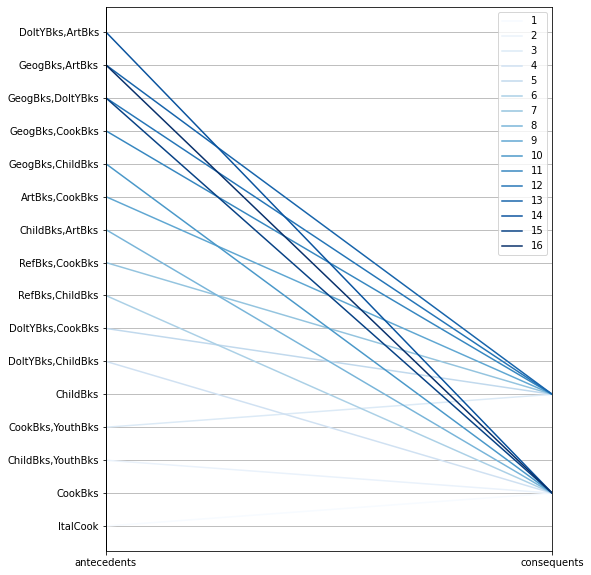

In [19]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,10))
parallel_coordinates(rules_3,'rule no',colormap='Blues')

# Using different Support  values

In [20]:

support=[]
dataset=[]
rules=[]
confidence=[]
min_threshold=.2


# setting max value to .43 as thts the maximum support value as we have seen earlier.
for i in np.arange(.01,.43,.01):
    frequent_dataSets = apriori(books, min_support=i, use_colnames=True)
    rules1 = association_rules(frequent_dataSets, metric="confidence", min_threshold=min_threshold)
    len_datasets=len(frequent_dataSets)
    dataset.append(len_datasets)
    len_rules=len(rules1)
    rules.append(len_rules)
    support.append(i)
    confidence.append(min_threshold)
    

    
    

In [21]:
final={'support':support,'frequent_dataset':dataset,'rules':rules,'confidence':confidence}
df1=pd.DataFrame(final)
df1.head(10)

,support,frequent_dataset,rules,confidence
0,0.01,594,7156,0.2
1,0.02,276,2353,0.2
2,0.03,181,1343,0.2
3,0.04,133,913,0.2
4,0.05,100,599,0.2
5,0.06,74,354,0.2
6,0.07,66,286,0.2
7,0.08,60,241,0.2
8,0.09,47,144,0.2
9,0.10,39,100,0.2


In [22]:
df1.shape

(42, 4)

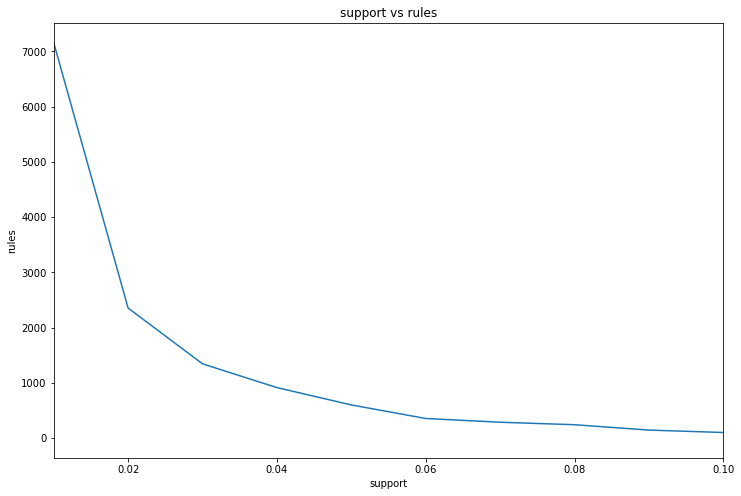

In [38]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df1,x="support",y="rules")
plt.title("support vs rules")
plt.xlim([.01, .1])
plt.show()


# Using different confidence values (Metric=Confidence)

In [24]:
support=[]
dataset=[]
rules=[]
confidence=[]
min_support=.01

for i in np.arange(.1,1,.01):
    frequent_dataSets = apriori(books, min_support=min_support, use_colnames=True)
    rules1 = association_rules(frequent_dataSets, metric="confidence", min_threshold=i)
    len_datasets=len(frequent_dataSets)
    dataset.append(len_datasets)
    len_rules=len(rules1)
    rules.append(len_rules)
    confidence.append(i)
    support.append(min_support)

In [25]:
final={'support':support,'frequent_dataset':dataset,'rules':rules,'confidence':confidence}
df2=pd.DataFrame(final)
df2.head(10)

,support,frequent_dataset,rules,confidence
0,0.01,594,9079,0.10
1,0.01,594,8843,0.11
2,0.01,594,8561,0.12
3,0.01,594,8285,0.13
4,0.01,594,8106,0.14
5,0.01,594,7926,0.15
6,0.01,594,7766,0.16
7,0.01,594,7611,0.17
8,0.01,594,7425,0.18
9,0.01,594,7283,0.19


In [26]:
df2.shape,df2.rules.value_counts()

((90, 4),
 342     2
 423     2
 1781    1
 1373    1
 1400    1
        ..
 4585    1
 4702    1
 4830    1
 4938    1
 2756    1
 Name: rules, Length: 88, dtype: int64)

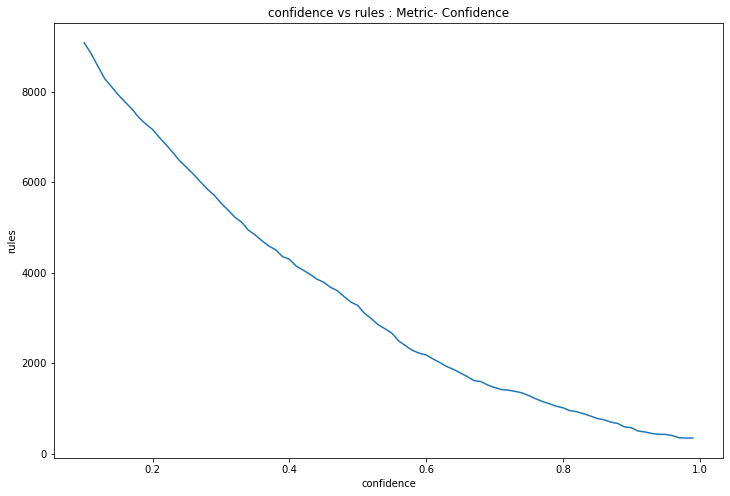

In [27]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df2,x="confidence",y="rules")
plt.title("confidence vs rules : Metric- Confidence")
plt.show()

# Using different confidence values (Metric=Lift)

In [28]:
support=[]
dataset=[]
rules=[]
confidence=[]
min_support=.01

for i in np.arange(1,5,.5):
    frequent_dataSets = apriori(books, min_support=min_support, use_colnames=True)
    rules1 = association_rules(frequent_dataSets, metric="lift", min_threshold=i)
    len_datasets=len(frequent_dataSets)
    dataset.append(len_datasets)
    len_rules=len(rules1)
    rules.append(len_rules)
    confidence.append(i)
    support.append(min_support)

In [29]:
final={'support':support,'frequent_dataset':dataset,'rules':rules,'confidence':confidence}
df3=pd.DataFrame(final)
df3.head(10)

,support,frequent_dataset,rules,confidence
0,0.01,594,11102,1.0
1,0.01,594,11030,1.5
2,0.01,594,10066,2.0
3,0.01,594,7422,2.5
4,0.01,594,5430,3.0
5,0.01,594,4224,3.5
6,0.01,594,3862,4.0
7,0.01,594,3522,4.5


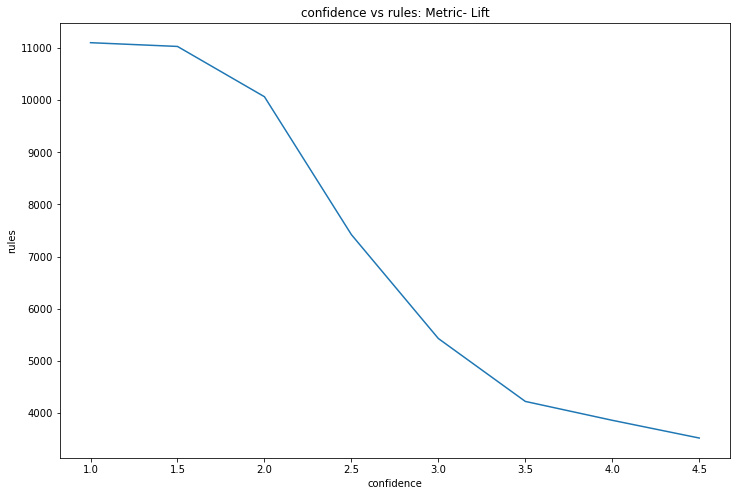

In [30]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df3,x="confidence",y="rules")
plt.title("confidence vs rules: Metric- Lift")
plt.show()

# Changing max length in apriori algorithm and observing the changes in association rules for confidence metric

Note: Please note the question mentions chnagin minn length, however there is no min length parramtere in apriori command , it should be max len.

In [31]:
data=[]
rules=[]
length=[]
confidence=[]

# setting the lenth at 10 as after 8 its a flat line 
for l in range(1,10):
    frequent_data = apriori(books, max_len=l,min_support=0.01, use_colnames=True)
    rules2 = association_rules(frequent_data, metric="confidence", min_threshold=0.2)
    len_data=len(frequent_data)
    data.append(len_data)
    len_rules=len(rules2)
    rules.append(len_rules)
    length.append(l)
    support.append(min_support)
    
    
print("Number of iterations:",l)

Number of iterations: 9


In [32]:
final={'frequent_dataset':data,'rules':rules,'length':length}
df4=pd.DataFrame(final)
df4.head(10)

,frequent_dataset,rules,length
0,11,0,1
1,65,86,2
2,208,670,3
3,408,2443,4
4,547,5080,5
5,590,6812,6
6,594,7156,7
7,594,7156,8
8,594,7156,9


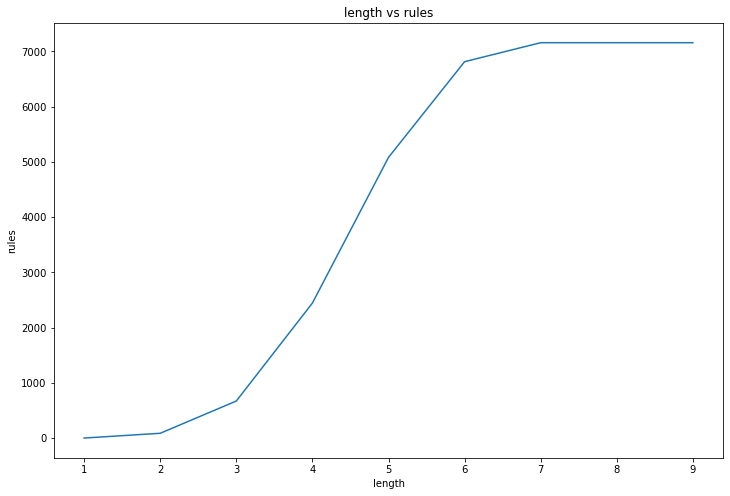

In [33]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df4,x="length",y="rules")
plt.title("length vs rules")
plt.show()

# Changing max length in apriori algorithm and observing the changes in association rules for Lift metric

In [34]:
data=[]
rules=[]
length=[]
confidence=[]

# setting the lenth at 10 as after 8 its a flat line 
for l in range(1,10):
    frequent_data = apriori(books, max_len=l,min_support=0.01, use_colnames=True)
    rules2 = association_rules(frequent_data, metric="lift", min_threshold=0.2)
    len_data=len(frequent_data)
    data.append(len_data)
    len_rules=len(rules2)
    rules.append(len_rules)
    length.append(l)
    support.append(min_support)
    
    
print("Number of iterations:",l)

Number of iterations: 9


In [35]:
final={'frequent_dataset':data,'rules':rules,'length':length}
df5=pd.DataFrame(final)
df5.head(10)

,frequent_dataset,rules,length
0,11,0,1
1,65,108,2
2,208,966,3
3,408,3766,4
4,547,7936,5
5,590,10602,6
6,594,11106,7
7,594,11106,8
8,594,11106,9


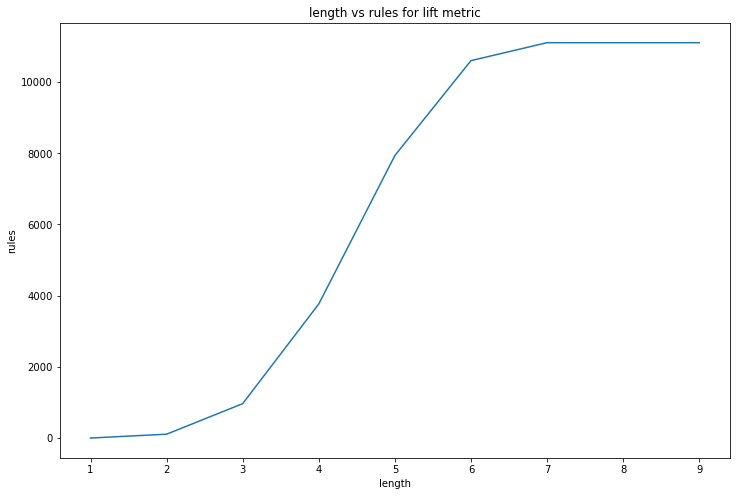

In [36]:
plt.figure(figsize=(12,8))

sns.lineplot(data=df5,x="length",y="rules")
plt.title("length vs rules for lift metric")
plt.show()